## Music Recommendation System (Data Processing and Analysis)

### Framing the Problem

This project is aimed upon building a music recommendation system that gives the user recommendations on music based on his music taste by analysing his previously heard music and playlist. This project is done in two ways, using 'User - to - User Recommendation' and 'Item - to - Item Recommendation'. Birch, MiniBatchKMeans and KMeans algorithms are being used along with 'Surprise' module to compute the similarity between recommendations and user's already existing playlist for evaluation

### Obtaining Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import missingno as ms
%matplotlib inline

In [8]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

In [9]:
curr_dir = os.path.join(os.getcwd(),"datasets","raw","fma_metadata")
print(curr_dir)

/home/gokulkurup/root/MusicRecomendationSystem/datasets/raw/fma_metadata


In [10]:
echonest = pd.read_csv(os.path.join(curr_dir,'echonest.csv'))
features = pd.read_csv(os.path.join(curr_dir,'features.csv'))
genres = pd.read_csv(os.path.join(curr_dir,'genres.csv'))
tracks = pd.read_csv(os.path.join(curr_dir,'tracks.csv'))

/home/gokulkurup/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixe

### Working with 'Echonest' dataset

#### Analysing Data

In [11]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 250 entries, Unnamed: 0 to echonest.248
dtypes: object(250)
memory usage: 25.0+ MB


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


In [13]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [14]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

In [15]:
echonest.head(10)

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,...,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,...,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,...,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,...,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,...,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
7,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,...,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781
8,139,0.1065495253,0.2609111726,0.6070668636,0.8350869898,...,0.0640399978,2.4366900921,2.3726501465,3.8970954418,37.8660430908
9,140,0.3763124975,0.7340790229,0.2656847734,0.6695811237,...,0.0753299966,9.8627195358,9.7873897552,21.9816207886,562.2294311523


#### Feature Engineering

<AxesSubplot:>

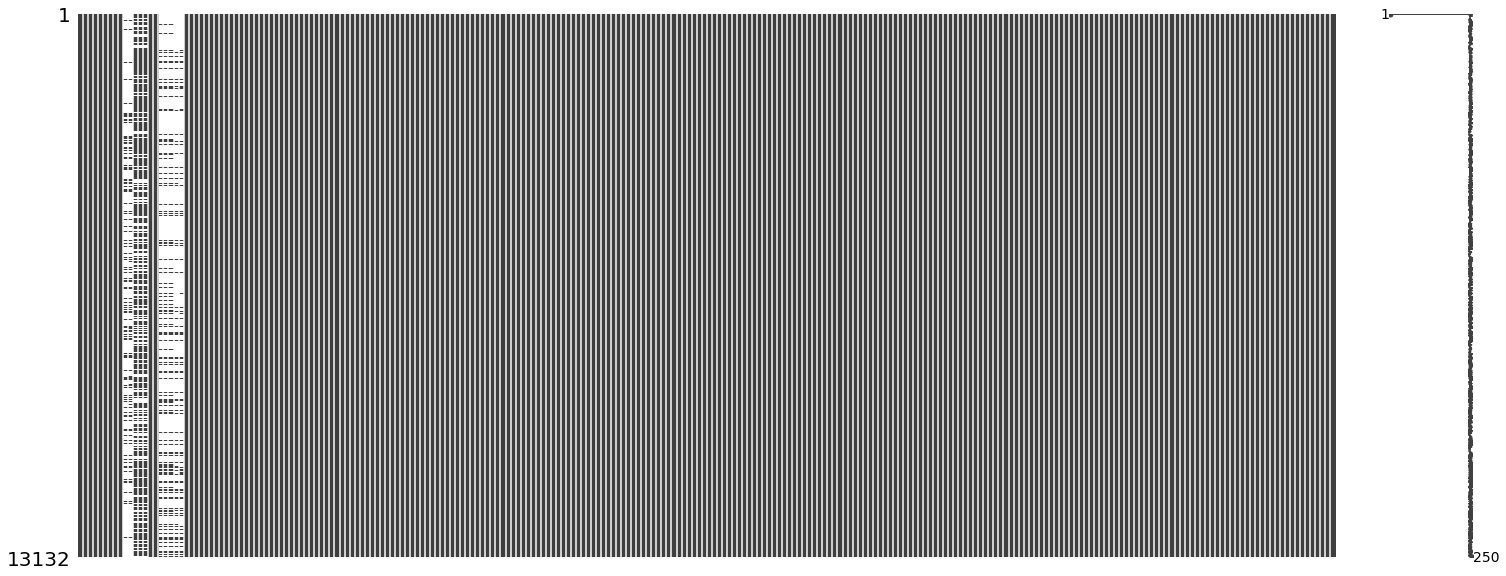

In [16]:
ms.matrix(echonest)

In [17]:
echonest.drop(['echonest.8', 'echonest.9', 'echonest.15', 'echonest.16', 'echonest.17', 'echonest.18', 'echonest.19'], axis=1, inplace=True)

In [18]:
echonest.tail(15)

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,...,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
13117,124818,0.092864,0.64608,0.772,0.569069,...,0.06354,2.19379,2.13025,5.541705,56.199059
13118,124819,0.212196,0.691758,0.801736,0.426629,...,0.06376,1.20807,1.14431,2.036453,7.25809
13119,124820,0.059584,0.702435,0.622037,0.099508,...,0.0624,1.20707,1.14467,2.145525,6.819393
13120,124850,0.105487,0.690411,0.546009,0.266321,...,0.06363,0.80522,0.74159,0.567929,1.35165
13121,124851,0.034877,0.641127,0.594074,0.478906,...,0.06367,0.99778,0.93411,1.569256,6.007699
13122,124852,0.702553,0.7289,0.590636,0.41506,...,0.06331,1.06667,1.00336,2.174237,11.556788
13123,124853,0.020307,0.689575,0.676306,0.891817,...,0.06045,0.89438,0.83393,1.494897,7.501858
13124,124854,0.026545,0.667363,0.657399,0.364107,...,0.06458,2.84526,2.78068,7.680386,138.16658
13125,124855,0.160281,0.604249,0.554242,0.728696,...,0.06363,1.08476,1.02113,1.830207,7.012114
13126,124856,0.112268,0.581255,0.665963,0.853041,...,0.06086,3.4971,3.43624,7.827642,138.703949


<AxesSubplot:>

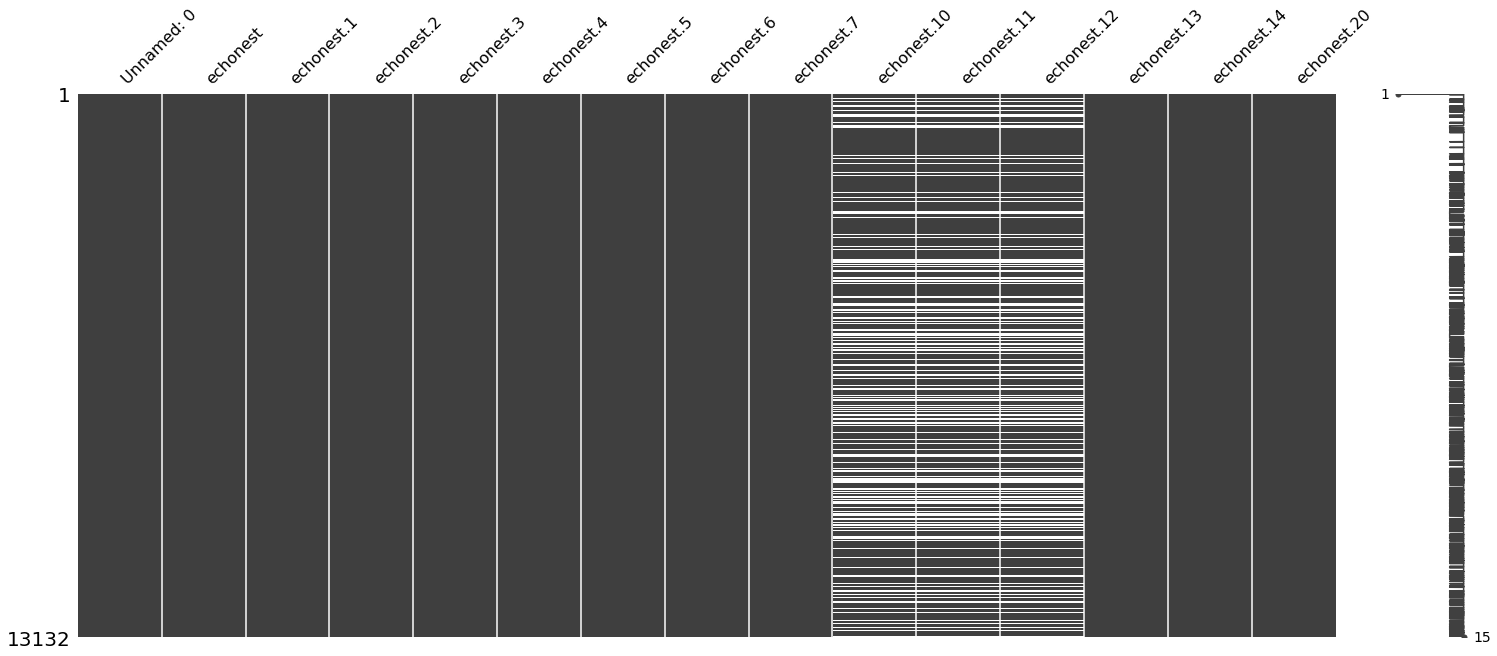

In [19]:
ms.matrix(echonest.iloc[:, 0:15])

In [20]:
echonest.drop(['echonest.10', 'echonest.11', 'echonest.12'], axis=1, inplace=True)

<AxesSubplot:>

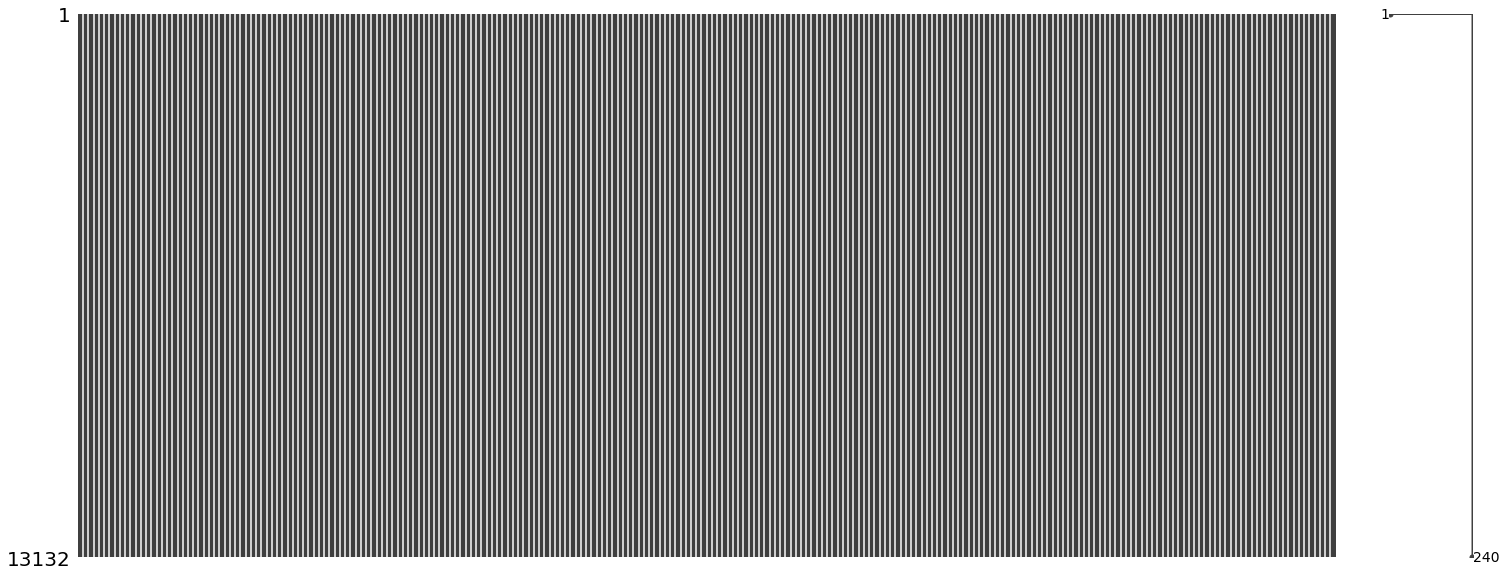

In [21]:
ms.matrix(echonest)

In [22]:
echonest.head(10)

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,...,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,...,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features
1,NaN,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,...,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,...,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,...,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,...,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
7,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,...,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781
8,139,0.1065495253,0.2609111726,0.6070668636,0.8350869898,...,0.0640399978,2.4366900921,2.3726501465,3.8970954418,37.8660430908
9,140,0.3763124975,0.7340790229,0.2656847734,0.6695811237,...,0.0753299966,9.8627195358,9.7873897552,21.9816207886,562.2294311523


In [23]:
echonest.drop(0, axis=0, inplace=True)

In [24]:
echonest.iloc[0, 0]

nan

In [25]:
echonest.iloc[1, 0]

'track_id'

In [26]:
echonest.iloc[0, 0] = echonest.iloc[1, 0]

In [27]:
echonest.head()

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,...,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
1,track_id,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
2,track_id,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,...,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,...,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,...,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047


In [28]:
echonest.drop(2, axis=0, inplace=True)

In [29]:
echonest.columns = echonest.iloc[0]

In [30]:
echonest.head()

1,track_id,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
1,track_id,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,...,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,...,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,...,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,...,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938


In [31]:
echonest.drop(1, axis=0, inplace=True)

In [32]:
echonest.head()

1,track_id,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,...,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,...,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,...,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,...,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
7,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,...,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781


In [33]:
echonest.reset_index(inplace=True)

In [34]:
echonest.drop('index', inplace=True, axis=1)

In [35]:
echonest.head()

1,track_id,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
0,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,...,0.0640799999,3.6769599915,3.6128799915,13.3166904449,262.9297485352
1,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,...,0.0641300008,6.0827698708,6.0186400414,16.6735477448,325.5810852051
2,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,...,0.0601399988,5.9264898300,5.8663496971,16.0138492584,356.7557373047
3,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,...,0.0808200017,8.4140100479,8.3331899643,21.3170642853,483.4038085938
4,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,...,0.0644000024,11.2670698166,11.2026700974,26.4541797638,751.1477050781


In [36]:
type(echonest['acousticness'][0])

str

In [37]:
def convert_to_float(df, columns):
    for i in columns:
        df[i] = df[i].astype('float')
    return df

In [38]:
echonest = convert_to_float(echonest, set(echonest.columns) - set(['track_id', 'artist_name', 'release']))

In [39]:
echonest.head()

1,track_id,acousticness,danceability,energy,instrumentalness,...,219,220,221,222,223
0,2,0.416675,0.675894,0.634476,0.010628,...,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,...,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,...,0.06014,5.92649,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,...,0.08082,8.41401,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,...,0.06440,11.26707,11.20267,26.454180,751.147705


In [40]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB


### Working with 'Features' dataset

#### Analysing Data

In [41]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


In [42]:
features.head(10)

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,...,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,...,mean,median,min,skew,std
1,number,01,02,03,04,...,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,...,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,...,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
5,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,...,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
6,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,...,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
7,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,...,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02
8,26,-6.9953453541e-01,-6.8415790796e-01,4.8824872822e-02,4.2658798397e-02,...,1.8387714401e-02,1.5625000000e-02,0.0000000000e+00,4.6905956268e+00,1.4598459937e-02
9,30,-7.2148716450e-01,-8.4855991602e-01,8.9090377092e-01,8.8619679213e-02,...,5.4416511208e-02,3.6132812500e-02,2.4414062500e-03,2.2447082996e+00,5.2673552185e-02


<AxesSubplot:>

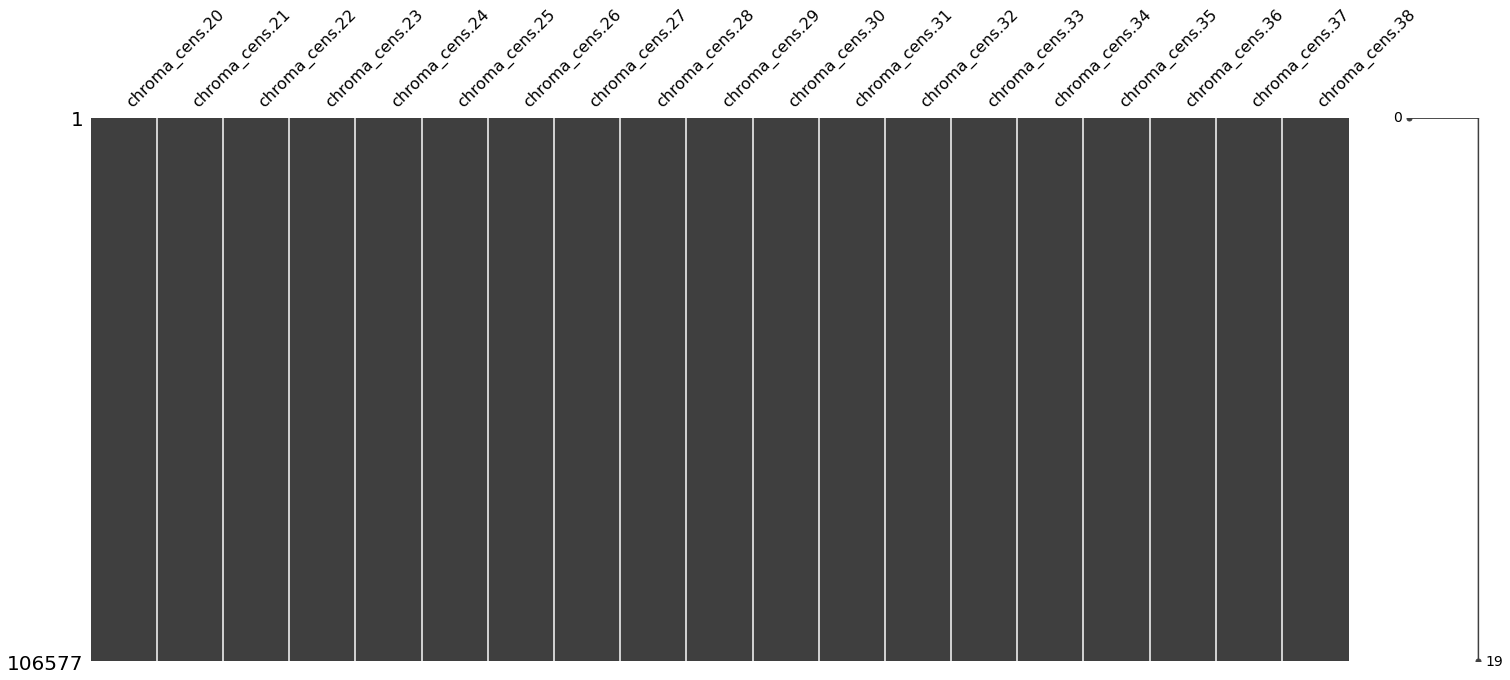

In [43]:
ms.matrix(features.iloc[:, 21:40])

#### Feature Engineering

In [44]:
features.iloc[0,0] = features.iloc[2, 0]

In [45]:
features.head(3)

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,...,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,track_id,kurtosis,kurtosis,kurtosis,kurtosis,...,mean,median,min,skew,std
1,number,01,02,03,04,...,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [46]:
features.drop(2, inplace=True)

In [47]:
len(features.columns)

519

In [48]:
len(features.iloc[0])

519

In [49]:
def combine_two_rows(df):
    columns = list(df.columns)
    for i in range(0, 519):
        columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [50]:
features.columns = combine_two_rows(features)

In [51]:
features.drop([0, 1], inplace=True)

In [52]:
features.reset_index(inplace=True)

In [53]:
features.drop('index', axis=1, inplace=True)

In [54]:
features.head()

,feature track_id,chroma_cens kurtosis,chroma_cens.1 kurtosis,chroma_cens.2 kurtosis,chroma_cens.3 kurtosis,...,zcr.2 mean,zcr.3 median,zcr.4 min,zcr.5 skew,zcr.6 std
0,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,...,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
1,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,...,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
2,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,...,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
3,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,...,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
4,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,...,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02


In [55]:
features = features.astype(dtype='float')
features['feature track_id'] = features['feature track_id'].astype('int')

In [ ]:
ms.matrix(features)

In [ ]:
features.head(3)

### Working with 'Tracks' dataset

#### Analysing Data

In [ ]:
tracks.info()

In [ ]:
tracks.head()

In [ ]:
tracks.iloc[0,0] = tracks.iloc[1, 0]

In [ ]:
tracks.drop(1, axis=0, inplace=True)

In [ ]:
tracks.head()

#### Feature Engineering

In [ ]:
len(tracks.columns)

In [ ]:
def combine_one_row(df):
    columns = list(df.columns)
    for i in range(0, 53):
        if i == 0:
            columns[i] = df.iloc[0, i]
        else:
            columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [ ]:
tracks.columns = combine_one_row(tracks)

In [ ]:
tracks.drop(0, inplace=True)

In [ ]:
tracks.reset_index(inplace=True)

In [ ]:
tracks.drop(['index'], axis=1, inplace=True)

In [ ]:
ms.matrix(tracks.iloc[0: 10])

In [ ]:
tracks.head()

In [ ]:
tracks['track.7 genre_top'].value_counts()

In [ ]:
track_title = pd.DataFrame(tracks['track.19 title'])

In [ ]:
track_title['track_id'] = tracks['track_id']

In [ ]:
track_title.head()

In [ ]:
track_title.tail()

In [ ]:
track_title.shape

In [ ]:
tracks.drop(['album comments','album.1 date_created', 
             'album.2 date_released', 'album.11 tracks', 
             'album.9 tags', 'album.8 producer', 'album.3 engineer', 'album.6 information',
             'artist active_year_begin', 'artist.1 active_year_end', 'artist.2 associated_labels',
             'artist.3 bio','artist.4 comments','artist.5 date_created', 'artist.7 id',
             'artist.8 latitude','artist.9 location','artist.10 longitude', 'artist.11 members',
             'artist.13 related_projects', 'artist.14 tags','artist.15 website','artist.16 wikipedia_page',
             'set.1 subset', 'track.1 comments', 'track.2 composer', 'track.3 date_created', 'track.4 date_recorded',
             'track.10 information', 'track.13 license', 'track.15 lyricist', 'track.17 publisher', 'track.18 tags',
             'track.19 title'], axis=1, inplace=True)

In [ ]:
tracks.info()

In [ ]:
ms.matrix(tracks)

In [ ]:
tracks['album.12 type'].value_counts()

In [ ]:
tracks['album.10 title'].value_counts()

In [ ]:
tracks['album.10 title'].fillna(method='ffill', inplace=True)

In [ ]:
tracks.drop(['track.12 language_code', 'album.12 type'], axis=1, inplace=True)

In [ ]:
tracks.drop('track.9 genres_all', axis=1, inplace=True)

In [ ]:
ms.matrix(tracks)

In [ ]:
tracks['track.8 genres'].unique()

In [ ]:
genres.info()

In [ ]:
type(tracks['track.7 genre_top'].iloc[27])

In [ ]:
def getList(cd):
    return cd[1:-1].split(',')

In [ ]:
for i in range(0, 106574):
    if type(tracks['track.7 genre_top'][i]) == float:
        genre_list = getList(str(tracks['track.8 genres'][i]))
        count = len(genre_list)
        title = ""
        for j in range(0, count):
            title = title + str(genres['title'][j]) + str('|')
        tracks['track.7 genre_top'][i] = title

### Working with 'Genre' dataset

#### Analysing Data

In [ ]:
genres.info()

In [ ]:
ms.matrix(genres)

In [ ]:
genres.head()

#### Feature Engineering

Nothing to engineer!

### Combining all datasets into a single entity

#### Analysing Data

In [ ]:
echonest.info()

In [ ]:
tracks.info()

In [ ]:
tracks.head()

In [ ]:
echonest.head()

In [ ]:
genres.info()

In [ ]:
features.info()

#### Feature Engineering

In [ ]:
features.columns = ['track_id'] + list(features.columns[1:])

In [ ]:
features.head()

In [ ]:
type(echonest['track_id'].iloc[0])

In [ ]:
echonest['track_id'] = echonest['track_id'].astype('int')
tracks['track_id'] = tracks['track_id'].astype('int')

In [ ]:
features.sort_values(by='track_id', inplace=True)
tracks.sort_values(by='track_id', inplace=True)
echonest.sort_values(by='track_id', inplace=True)

In [ ]:
features.head()

In [ ]:
tracks.head()

In [ ]:
count = 0
for i in range(0, 106574):
    if features['track_id'][i] == tracks['track_id'][i]:
        count += 1
    else:
        print(features['track_id'][i], tracks['track_id'][i])

In [ ]:
final = pd.concat([features, tracks.drop('track_id', axis=1)], axis=1)

In [ ]:
final.shape

In [ ]:
final.head()

In [ ]:
echonest.tail(3)

In [ ]:
echonest.drop(['artist_name', 'release'], axis=1, inplace=True)

In [ ]:
tracks.tail(3)

In [ ]:
features.head(1)

In [ ]:
final = echonest.merge(final, on='track_id')

In [ ]:
final.shape

In [ ]:
ms.matrix(final)

### Analysing Data

In [ ]:
final.head()

In [ ]:
final.shape

In [ ]:
final.info()

In [ ]:
final.drop('track.8 genres', axis=1, inplace=True)

In [ ]:
final.shape

In [ ]:
final.head()

In [ ]:
final['track.7 genre_top'].value_counts()

### Feature Engineering

In [ ]:
def format_strings(x):
    if '-' in x:
        return ''.join(x.split('-'))
    if x.find('/'):
        return '|'.join(x.split('/'))
    return x

In [ ]:
def modifyString(serie, val):
    for i in range(0, val):
        if serie[i] == 'Old-Time / Historic':
            serie[i] = 'OldTime|Historic'
    return serie

In [ ]:
final['track.7 genre_top'] = modifyString(final['track.7 genre_top'], 13129)

In [ ]:
final['track.7 genre_top'] = final['track.7 genre_top'].apply(format_strings)

In [ ]:
final['track.7 genre_top'].value_counts()

In [ ]:
final.head()

In [ ]:
metadata = pd.DataFrame()

In [ ]:
metadata['track_id'] = final['track_id']

In [ ]:
metadata.shape

In [ ]:
track_title.shape

In [ ]:
track_title = track_title.set_index('track_id')

In [ ]:
track_title.head()

In [ ]:
track_title.index = [int(i) for i in track_title.index]

In [ ]:
track_title.head()

In [ ]:
metadata.head()

In [ ]:
metadata['album_title'] = final['album.10 title']

In [ ]:
metadata['artist_name'] = final['artist.12 name']

In [ ]:
metadata['genre'] = final['track.7 genre_top']

In [ ]:
metadata = metadata.set_index('track_id')

In [ ]:
metadata.tail()

In [ ]:
metadata.head()

In [ ]:
metadata['track_title'] = track_title.loc[metadata.index]['track.19 title']

In [ ]:
metadata.tail()

In [ ]:
metadata.head()

In [ ]:
len(metadata[metadata['genre'].isnull()])

In [ ]:
final.drop('album.10 title', axis=1, inplace=True)

In [ ]:
final.head()

In [ ]:
final.info()

In [ ]:
final.drop('artist.12 name', axis=1, inplace=True)

In [ ]:
final.info()

In [ ]:
final.head()

In [ ]:
k = final # Restore point # Removed Label Encoding

In [ ]:
final.head()

In [ ]:
final.drop('set split', axis=1, inplace=True)

In [ ]:
final.info()

In [ ]:
final.info()

In [ ]:
genres['title'].count()

In [ ]:
genre_dummy = pd.DataFrame(data= np.zeros((13129, 163)), columns= list(genres['title'].unique()))

In [ ]:
genre_dummy.head()

In [ ]:
genre_list = pd.Series(data= genre_dummy.columns)

In [ ]:
genre_list = modifyString(genre_list, 163)

In [ ]:
genre_list = genre_list.apply(format_strings)

In [ ]:
genre_dummy.columns= genre_list

In [ ]:
# columns converted successfully

In [ ]:
genre_list = list(genre_list)

In [ ]:
final

In [ ]:
for i in range(0, 13129):
    if '|' in final['track.7 genre_top'][i]:
        divided_list = str(final['track.7 genre_top'][i]).split('|')
        count = len(divided_list)
        for j in range(0, count):
            if divided_list[j] in genre_list:
                location = genre_list.index(divided_list[j])
                genre_dummy.iloc[i, location] = 1
    else:
        location = genre_list.index(final['track.7 genre_top'][i])
        genre_dummy.iloc[i, location] = 1

In [ ]:
genre_list.index(final['track.7 genre_top'][0])

In [ ]:
final.drop(['track.7 genre_top'], axis= 1, inplace= True)

In [ ]:
final = pd.concat([final, genre_dummy], axis= 1)

In [ ]:
final.head()

### Writing final data to .csv files

In [ ]:
import os

if not os.path.isdir(os.path.join('datasets','final')):
    os.makedirs(os.path.join('datasets','final'))
    
metadata.to_csv('datasets/final/metadata.csv')
final.to_csv('datasets/final/final.csv')